## Import pandas and matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Read csv from NYC Open Data 
(Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

All 311 Service Requests for Dirty Conditions and Descriptor «Trash» in 2022

In [5]:
df = pd.read_csv('./data/dirty-condition-2022.csv', low_memory=False)
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,56415569,12/31/2022 11:26:53 PM,01/07/2023 03:14:40 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11102.0,27-24 21 STREET,...,NaN,40.771570,-73.926479,"(40.77156979077409, -73.92647927553604)",16859.0,39.0,3.0,4.0,72.0,72.0
1,56415724,12/31/2022 11:03:39 PM,01/06/2023 05:15:40 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11419.0,108-01 LIBERTY AVENUE,...,NaN,40.683846,-73.833444,"(40.68384637247547, -73.83344381202258)",24015.0,62.0,3.0,46.0,64.0,64.0
2,56482084,12/31/2022 09:53:14 PM,01/09/2023 08:51:20 AM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11372.0,86-04 NORTHERN BOULEVARD,...,NaN,40.755959,-73.881483,"(40.75595861193441, -73.88148263226175)",14783.0,65.0,3.0,5.0,73.0,73.0
3,56555195,12/31/2022 09:24:58 PM,01/27/2023 12:34:30 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10026.0,241 WEST 116 STREET,...,NaN,40.803928,-73.954181,"(40.803928064932066, -73.95418072613347)",12423.0,18.0,4.0,36.0,18.0,18.0
4,56411064,12/31/2022 08:26:13 PM,01/04/2023 01:54:10 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11207.0,1 VERMONT STREET,...,NaN,40.679943,-73.895924,"(40.679942667948254, -73.89592383711063)",17214.0,45.0,2.0,37.0,47.0,47.0


### Check type of the Columns

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42446 entries, 0 to 42445
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      42446 non-null  int64  
 1   Created Date                    42446 non-null  object 
 2   Closed Date                     42444 non-null  object 
 3   Agency                          42446 non-null  object 
 4   Agency Name                     42446 non-null  object 
 5   Complaint Type                  42446 non-null  object 
 6   Descriptor                      42446 non-null  object 
 7   Location Type                   42446 non-null  object 
 8   Incident Zip                    42442 non-null  float64
 9   Incident Address                42445 non-null  object 
 10  Street Name                     42445 non-null  object 
 11  Cross Street 1                  42392 non-null  object 
 12  Cross Street 2                  

### Check for missing data

In [115]:
# Check for missing values
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                           2
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                            0
Location Type                         0
Incident Zip                          4
Incident Address                      1
Street Name                           1
Cross Street 1                       54
Cross Street 2                       29
Intersection Street 1                54
Intersection Street 2                29
Address Type                          6
City                               2872
Landmark                           2881
Facility Type                     42446
Status                                0
Due Date                          42446
Resolution Description               15
Resolution Action Updated Date        1
Community Board                       0
BBL                                5380


## Analyse Dataset

### Sigthings by Borough

In [116]:
# Remove Unspecified boroughs and save to existing data
df = df[df['Borough'] != 'Unspecified']

# Group by Descriptor
df['Descriptor'].value_counts()

# Remove where Descriptor is not Trash
df = df[df['Descriptor'] == 'Trash']

df['Descriptor'].value_counts()



Descriptor
Trash    37334
Name: count, dtype: int64

In [6]:
# Dirty Condition by borough
df_borough = df['Borough'].value_counts()

<Axes: title={'center': 'Dirty Condition by Borough'}, ylabel='Borough'>

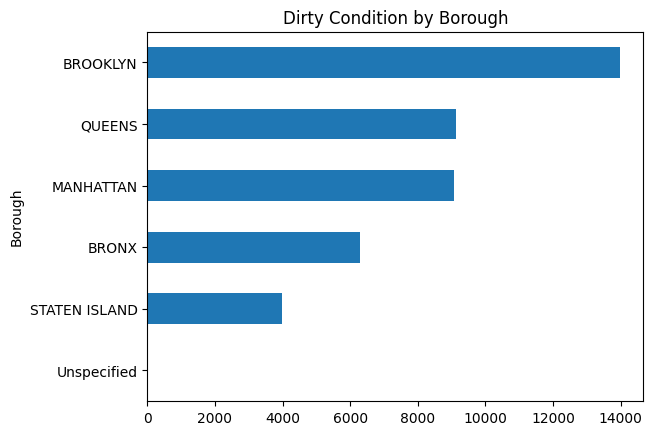

In [7]:
# plot Dirty Condition by borough horizontal bar chart sorted by count
df['Borough'].value_counts().sort_values().plot(kind='barh', title='Dirty Condition by Borough')


Just for 2022 because we have population data from 2022

In [9]:

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# df['Borough'].value_counts() just for year 2022
df_2022 = df[df['Created Date'].dt.year == 2022]

df_2022_by_borough = df_2022['Borough'].value_counts()

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_15284/2588843374.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'])


<Axes: title={'center': 'Dirty Condition by Borough in 2022'}, ylabel='Borough'>

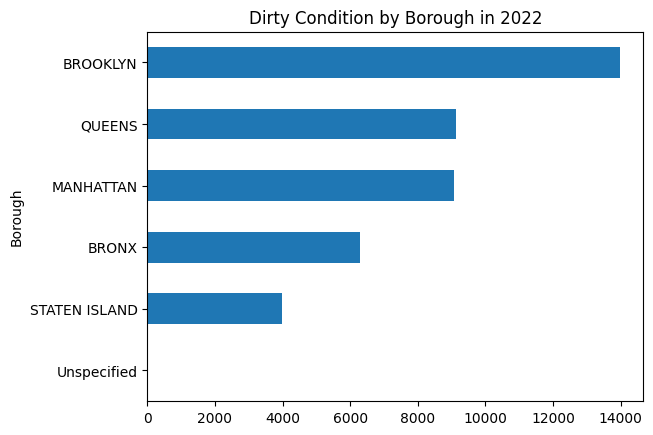

In [11]:
df_2022['Borough'].value_counts().sort_values().plot(kind='barh', title='Dirty Condition by Borough in 2022')


In [120]:
# export df_2022_by_borough to csv
df_2022_by_borough.to_csv('./data/dirty_condition_2022_by_borough.csv')

### Dirty Condition by Zip Code for all years

In [ ]:
# Dirty Condition by zip code
df['Incident Zip'].value_counts()

Incident Zip
10468.0    932
10312.0    905
11237.0    757
10039.0    676
10309.0    628
          ... 
10174.0      1
10103.0      1
10178.0      1
10107.0      1
10167.0      1
Name: count, Length: 189, dtype: int64

### Plotting a time series of dirty conditions by date

<Axes: title={'center': 'Dirty Condition by Date'}, xlabel='Created Date'>

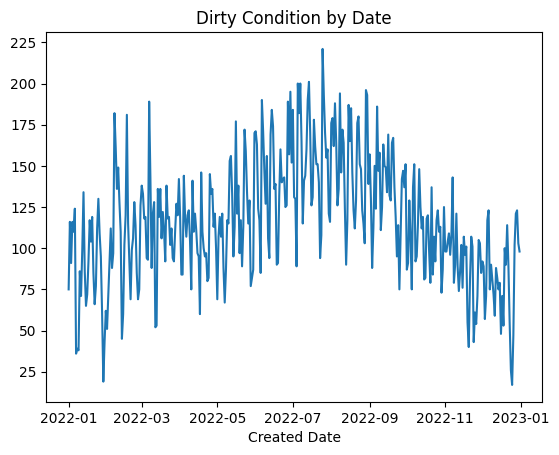

In [12]:
# line plot of Dirty Condition by date
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date'].dt.date.value_counts().sort_index().plot(title='Dirty Condition by Date')

Timeserie by Borough

<Axes: title={'center': 'Dirty Condition by Borough and Month'}, xlabel='Created Date'>

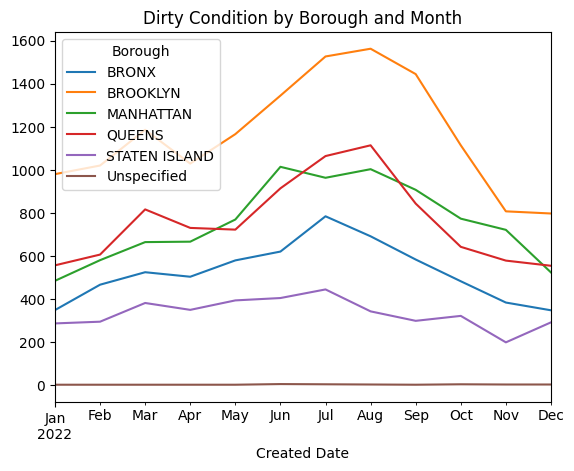

In [14]:
# line plot of Dirty Condition by date

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Group by 'Borough' and 'Created Date', then count sightings for each date within each borough
# Unstack the 'Borough' to get borough-wise columns
# Resample by month ('M') and sum the counts to get total sightings per month for each borough
# Plot the data
df.groupby('Borough')['Created Date'].value_counts().unstack(0).resample('ME').sum().plot(title='Dirty Condition by Borough and Month')


### Dates with the most Dirty Condition

In [ ]:
# 10 days with the most Dirty Condition
df['Created Date'].dt.date.value_counts().nlargest(10)

Created Date
2022-07-25    221
2022-07-14    201
2022-07-07    200
2022-07-05    200
2022-08-29    195
2022-06-29    195
2022-08-08    194
2022-07-26    193
2022-08-30    193
2022-06-06    190
Name: count, dtype: int64

In [ ]:
# date of the most Dirty Condition
df['Created Date'].dt.date.value_counts().idxmax()

datetime.date(2022, 7, 25)

dates with the most Dirty Condition for manhattan

In [ ]:
# three dates of the most Dirty Condition in manhattan
df[df['Borough'] == 'MANHATTAN']['Created Date'].dt.date.value_counts().nlargest(3)

Created Date
2022-09-27    56
2022-08-30    48
2022-09-07    48
Name: count, dtype: int64

### Dirty Condition by year

In [ ]:
# Dirty Condition by year and sort by year
df['Created Date'].dt.year.value_counts().sort_index(ascending=False)


Created Date
2022    42436
Name: count, dtype: int64

<Axes: title={'center': 'Dirty Condition by Year'}, xlabel='Created Date'>

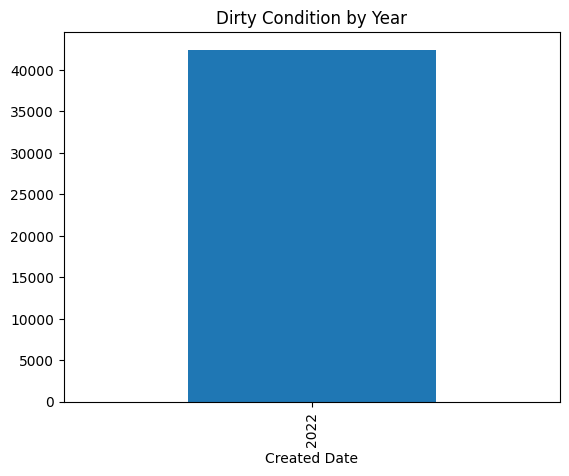

In [15]:
# plot Dirty Condition by year
df['Created Date'].dt.year.value_counts().sort_index(ascending=True).plot(kind='bar', title='Dirty Condition by Year')

## Dirty Condition by weekday

Created Date
Friday       6087
Monday       6909
Saturday     4698
Sunday       4642
Thursday     6566
Tuesday      6840
Wednesday    6704
Name: count, dtype: int64

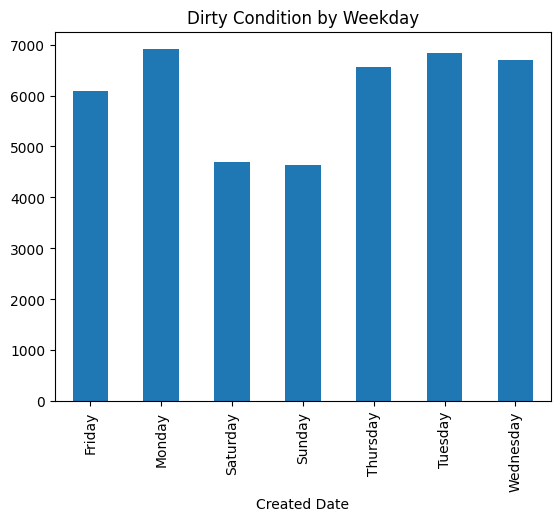

In [16]:
# Dirty Condition by weekday
df['Created Date'].dt.day_name().value_counts()

# plot Dirty Condition by weekday
# df['Created Date'].dt.day_name().value_counts().plot(kind='bar')

# sum of Dirty Condition by weekday and plot
df['Created Date'].dt.day_name().value_counts().sort_index().plot(kind='bar', title='Dirty Condition by Weekday')

# sum of Dirty Condition by weekday and total count for all weekdays
df['Created Date'].dt.day_name().value_counts().sort_index()



### Dirty Condition by months

In [ ]:
# irst create a DataFrame that counts the occurrences of each 'month_year' combination,
# then pivot this DataFrame to have months as columns and years as rows.

# Step 1: Convert 'Created Date' to datetime if not already done
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Extract month and year into a new column
df['month_year'] = df['Created Date'].dt.to_period('M')

# Step 3: Count occurrences of each 'month_year'
month_year_counts = df['month_year'].value_counts().sort_index()

# Step 4: Convert the Series to a DataFrame
month_year_df = month_year_counts.reset_index()
month_year_df.columns = ['month_year', 'count']

# Step 5: Extract year and month from 'month_year' to separate columns
month_year_df['year'] = month_year_df['month_year'].dt.year
month_year_df['month'] = month_year_df['month_year'].dt.month

# Step 6: Pivot the DataFrame to have years as rows and months as columns
pivot_df = month_year_df.pivot(index='year', columns='month', values='count')

pivot_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2022,2649,2961,3566,3272,3624,4292,4777,4708,4071,3327,2682,2507


export the table as csv

In [ ]:
# export pivot to csv
pivot_df.to_csv('./data/pivot_dirty_condition_2022.csv')

### Dirt Condition by Zip Code then merge it with unique City and Borough for each Incident Zip to get a list for export

In [ ]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df['Incident Zip'].value_counts().sort_values(ascending=False)

Incident Zip
10312    1009
10468     957
11237     807
10039     717
11226     663
         ... 
10103       1
10107       1
10167       1
10168       1
10282       1
Name: count, Length: 195, dtype: int64

In [ ]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df_2022 = df[df['Created Date'].dt.year == 2022]

df_2022['Incident Zip'].value_counts().sort_values(ascending=False)


Incident Zip
10312    1009
10468     957
11237     807
10039     717
11226     663
         ... 
10103       1
10107       1
10167       1
10168       1
10282       1
Name: count, Length: 195, dtype: int64

In [ ]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df_2022 = df[df['Created Date'].dt.year == 2022]

df

## old version
# sum of Dirty Condition for year 2022
# Dirty Condition = df_2022['Incident Zip'].value_counts()
# Dirty Condition

# group the dirty_condition_2022 by city and borough

# Step 1: Aggregate Dirty Condition by 'Incident Zip' with size() method to get the count of sightings
dirty_condition_count = df_2022.groupby('Incident Zip').size().reset_index(name='Dirty Condition Count')

# Step 2: Get unique City and Borough for each 'Incident Zip'
city_borough_mapping = df_2022.groupby('Incident Zip')[['City', 'Borough']].first().reset_index()

# Step 3: Merge the aggregated sightings with city and borough information
dirty_condition_2022 = pd.merge(dirty_condition_count, city_borough_mapping, on='Incident Zip', how='left')

dirty_condition_2022.sort_values('Dirty Condition Count', ascending=False)


,Incident Zip,Dirty Condition Count,City,Borough
66,10312,1009,STATEN ISLAND,STATEN ISLAND
85,10468,957,BRONX,BRONX
138,11237,807,BROOKLYN,BROOKLYN
38,10039,717,NEW YORK,MANHATTAN
128,11226,663,BROOKLYN,BROOKLYN
...,...,...,...,...
45,10105,1,NEW YORK,MANHATTAN
44,10103,1,NEW YORK,MANHATTAN
53,10278,1,None,MANHATTAN
55,10282,1,NEW YORK,MANHATTAN


In [ ]:
# read population-nyc-2022.csv and merge column B01003001 with Incident Zip in dirty_condition_2022
population = pd.read_csv('./data/population-nyc-2022.csv')

# population.head(5)
# print(population.dtypes)

# format column B01003001 to integer
population['B01003001'] = population['B01003001'].astype(int)


# remove the first row of the population dataframe
population = population.iloc[1:]

# format geoid to integer
population['name'] = population['name'].astype(int)


# rename column B01003001 to 'Population'
population.rename(columns={'B01003001': 'Population'}, inplace=True)

# match name in population with incident zip in dirty_condition_2022 and than merge the column population to dirty_condition_2022

# 1. Selects only the name and population columns from the population DataFrame for the merge.
# 2. Merges dirty_condition_2022 with the selected columns from population, matching on Incident Zip from dirty_condition_2022 and name from population.
# 3. Drops the name column after the merge, as it's redundant with Incident Zip.

dirty_condition_2022 = pd.merge(dirty_condition_2022, population[['name', 'Population']], left_on='Incident Zip', right_on='name', how='left').drop(columns=['name'])

# remove rows where population is NaN
dirty_condition_2022 = dirty_condition_2022.dropna(subset=['Population'])
# sort by Dirty Condition Count
dirty_condition_2022.sort_values('Dirty Condition Count', ascending=False)

,Incident Zip,Dirty Condition Count,City,Borough,Population
66,10312,1009,STATEN ISLAND,STATEN ISLAND,63473.0
85,10468,957,BRONX,BRONX,81397.0
138,11237,807,BROOKLYN,BROOKLYN,47183.0
38,10039,717,NEW YORK,MANHATTAN,29887.0
128,11226,663,BROOKLYN,BROOKLYN,101053.0
...,...,...,...,...,...
51,10174,1,NEW YORK,MANHATTAN,0.0
49,10168,1,None,MANHATTAN,0.0
48,10167,1,NEW YORK,MANHATTAN,0.0
44,10103,1,NEW YORK,MANHATTAN,0.0


In [ ]:
# read population-nyc-2022.csv and merge column B01003001 with Incident Zip in dirty_condition_2022
population = pd.read_csv('./data/population-nyc-2022.csv')

# format column B01003001 to integer
population['B01003001'] = population['B01003001'].astype(int)

# remove the first row of the population dataframe because it contains the total population of NYC
population = population.iloc[1:]

# format geoid to integer
population['name'] = population['name'].astype(int)


# rename column B01003001 to 'Population'
population.rename(columns={'B01003001': 'Population'}, inplace=True)

# match name in population with incident zip in dirty_condition_2022 and than merge the column population to dirty_condition_2022

# 1. Selects only the name and population columns from the population DataFrame for the merge.
# 2. Merges dirty_condition_2022 with the selected columns from population, matching on Incident Zip from dirty_condition_2022 and name from population.
# 3. Drops the name column after the merge, as it's redundant with Incident Zip.

if 'Population' not in dirty_condition_2022.columns:
    dirty_condition_2022 = pd.merge(dirty_condition_2022, population[['name', 'Population']], left_on='Incident Zip', right_on='name', how='left').drop(columns=['name'])

# Convert 'Population' to integer after the merge to ensure no decimals
dirty_condition_2022['Population'] = pd.to_numeric(dirty_condition_2022['Population'], downcast='integer', errors='coerce')


# Remove rows where population is NaN
dirty_condition_2022 = dirty_condition_2022.dropna(subset=['Population'])

dirty_condition_2022.sort_values('Dirty Condition Count', ascending=False)

,Incident Zip,Dirty Condition Count,City,Borough,Population_x,Population_y,Population
60,10312,1005,STATEN ISLAND,STATEN ISLAND,63473.0,63473,63473
79,10468,957,BRONX,BRONX,81397.0,81397,81397
132,11237,807,BROOKLYN,BROOKLYN,47183.0,47183,47183
36,10039,716,NEW YORK,MANHATTAN,29887.0,29887,29887
122,11226,663,BROOKLYN,BROOKLYN,101053.0,101053,101053
...,...,...,...,...,...,...,...
42,10103,1,NEW YORK,MANHATTAN,0.0,0,0
44,10167,1,NEW YORK,MANHATTAN,0.0,0,0
45,10168,1,None,MANHATTAN,0.0,0,0
48,10278,1,None,MANHATTAN,0.0,0,0


In [ ]:
# read nta-nyc-2022.csv and merge column NTAName with Incident Zip in dirty_condition_2022
nta = pd.read_csv('./data/nta-nyc-2022.csv')
# nta.info()

# Fill NaN values with a placeholder before converting to int
nta['ZIP'] = nta['ZIP'].fillna(0).astype(int)

# Perform the merge while keeping all columns from dirty_condition_2022 and adding the NTA column from nta
if 'NTA' not in dirty_condition_2022.columns:
    dirty_condition_2022 = pd.merge(dirty_condition_2022, nta[['ZIP', 'NTA']], left_on='Incident Zip', right_on='ZIP', how='left') \
        .drop(columns=['ZIP']) \
        .drop_duplicates(subset=['Incident Zip'])

dirty_condition_2022 = dirty_condition_2022.sort_values('Dirty Condition Count', ascending=False)
dirty_condition_2022.reset_index(drop=True)

,Incident Zip,Dirty Condition Count,City,Borough,Population,NTA
0,10312,1009,STATEN ISLAND,STATEN ISLAND,63473.0,NaN
1,10468,957,BRONX,BRONX,81397.0,Kingsbridge Heights
2,11237,807,BROOKLYN,BROOKLYN,47183.0,Bushwick North
3,10039,717,NEW YORK,MANHATTAN,29887.0,Central Harlem North-Polo Grounds
4,11226,663,BROOKLYN,BROOKLYN,101053.0,Flatbush
...,...,...,...,...,...,...
184,10174,1,NEW YORK,MANHATTAN,0.0,Turtle Bay-East Midtown
185,10168,1,None,MANHATTAN,0.0,Murray Hill-Kips Bay
186,10167,1,NEW YORK,MANHATTAN,0.0,Turtle Bay-East Midtown
187,10103,1,NEW YORK,MANHATTAN,0.0,Midtown-Midtown South


export to csv

In [ ]:
# export dirty condition by zip code for year 2022 to csv
dirty_condition_2022.to_csv('./data/dirty_condition_2022_by_zip_nta.csv', header=True)

### Look for changes for Zip 10001, 10002 and 10003

<Axes: title={'center': 'Dirty Condition in Zip Codes 10001, 10002, 10003'}, xlabel='Month-Year', ylabel='Sightings'>

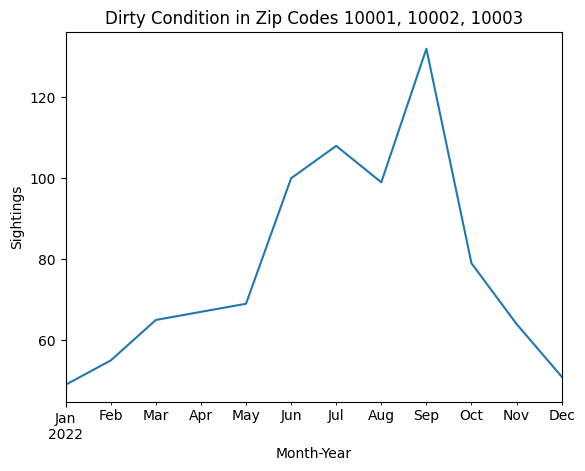

In [ ]:
# Step 1: Ensure 'Created Date' is a datetime column
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Create 'month_year' column
df['month_year'] = df['Created Date'].dt.to_period('M')

# Step 3: Filter for specified zip codes and group by 'month_year' show the last 12 months
zip_filtered_counts = df[df['Incident Zip'].isin([10001, 10002, 10003])].groupby('month_year').size().tail(36)

# Step 4: Plot the result
zip_filtered_counts.plot(title='Dirty Condition in Zip Codes 10001, 10002, 10003', xlabel='Month-Year', ylabel='Sightings')

### Plot all incidents on a map

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_8677/3669709234.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True, errors='coerce')
/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_8677/3669709234.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True, errors='coerce')


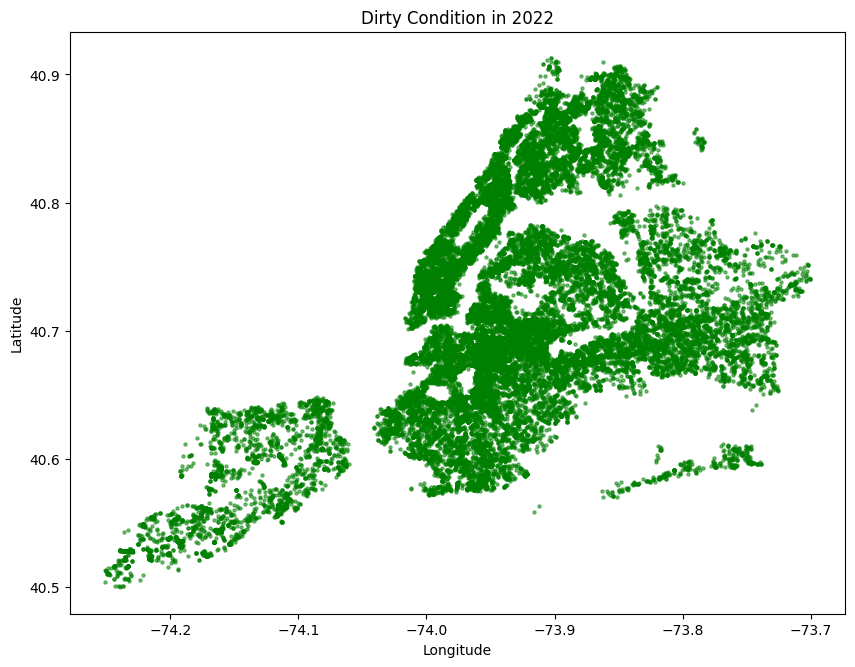

In [124]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = './data/dirty-condition-2022.csv'  # Ensure the file is in the correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure the 'Created Date' column is in datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True, errors='coerce')

# Extract year from 'Created Date' and create a new 'year' column
df['year'] = df['Created Date'].dt.year

# Filter for Dirty Condition from 2022
df_2022 = df[df['year'].isin([2022])].copy()

# Define the column names for latitude and longitude
latitude_col = 'Latitude'
longitude_col = 'Longitude'

# Check if 'geometry' column exists, if not create it
if 'geometry' not in df_2022.columns:
    # Ensure 'Latitude' and 'Longitude' columns exist
    if latitude_col in df_2022.columns and longitude_col in df_2022.columns:
        # Create 'geometry' column from 'Latitude' and 'Longitude'
        df_2022['geometry'] = [Point(xy) for xy in zip(df_2022[longitude_col], df_2022[latitude_col])]
        gdf_2022 = gpd.GeoDataFrame(df_2022, geometry='geometry')
        # Save the GeoDataFrame as a GeoJSON file
        geojson_path = './dirty-conditions-2022.geojson'  # Ensure this path is correct and writable
        gdf_2022.to_file(geojson_path, driver='GeoJSON')
    else:
        print("Latitude and longitude columns are missing.")
else:
    gdf_2022 = gpd.GeoDataFrame(df_2022, geometry='geometry')
    # Save the GeoDataFrame as a GeoJSON file
    geojson_path = './dirty-conditions-2022.geojson'  # Ensure this path is correct and writable
    gdf_2022.to_file(geojson_path, driver='GeoJSON')

# print(f'GeoJSON file saved to: {geojson_path}')

# Plot the data on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = gdf_2022.plot(ax=ax, color='green', markersize=5, alpha=0.5)
plt.title('Dirty Condition in 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
